HEART DISEASE 

There are 13 attributes:

1-Age: age in years

2-Sex: sex (1 = male; 0 = female)

3-ChestPainType: chest pain type
 * Value 0: typical angina
 * Value 1: atypical angina
 * Value 2: non-anginal pain
 * Value 3: asymptomatic

4-BloodPressure: resting blood pressure (in mm Hg on admission to the hospital)

5-Cholesterol: serum cholestoral in mg/dl

6-BloodSugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7-RestingECG: resting electrocardiographic results
 * Value 0: normal
 * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8-HeartRate: maximum heart rate achieved

9-ExerciseAngina: exercise induced angina (1 = yes; 0 = no)

10-Oldpeak = ST depression induced by exercise relative to rest

11-ST_Slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

12-HeartDisease: 0 = no disease, 1 = disease

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data=pd.read_csv('HeartDisease.csv')

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,BloodPressure,Cholesterol,BloodSugar,RestingECG,HeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [4]:
heart_data.tail()

,Age,Sex,ChestPainType,BloodPressure,Cholesterol,BloodSugar,RestingECG,HeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,0
301,57,1,0,130,131,0,1,115,1,1.2,1,0
302,57,0,1,130,236,0,0,174,0,0.0,1,0


In [5]:
heart_data.shape

(303, 12)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   BloodPressure   303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   BloodSugar      303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   HeartRate       303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
BloodPressure     0
Cholesterol       0
BloodSugar        0
RestingECG        0
HeartRate         0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
 heart_data.describe()

,Age,Sex,ChestPainType,BloodPressure,Cholesterol,BloodSugar,RestingECG,HeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Distribution Plot for numeric columns

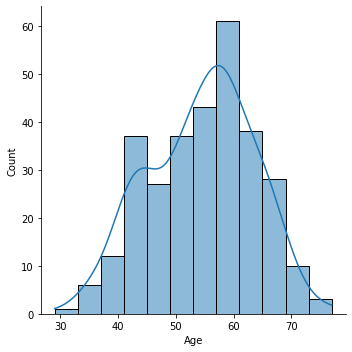

In [9]:
sns.displot(heart_data['Age'],kde=True)

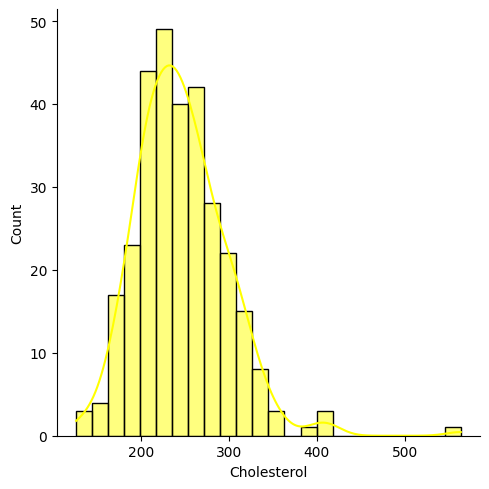

In [10]:
sns.displot(heart_data['Cholesterol'],kde=True , color= 'yellow' )

Pie Chart

<AxesSubplot:ylabel='None'>

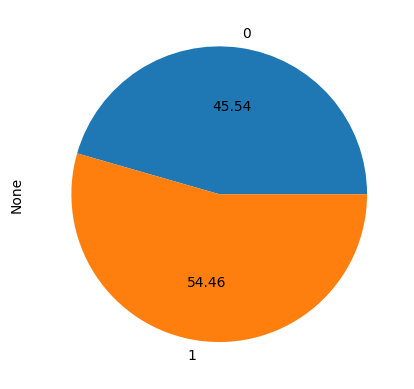

In [11]:
heart_data. groupby('HeartDisease').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='None'>

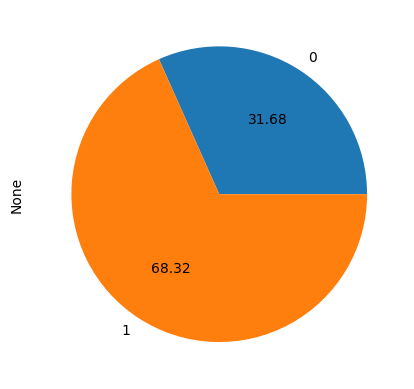

In [12]:
heart_data. groupby('Sex').size().plot(kind='pie', autopct='%.2f')

ViolenPlot

<AxesSubplot:xlabel='HeartDisease', ylabel='BloodPressure'>

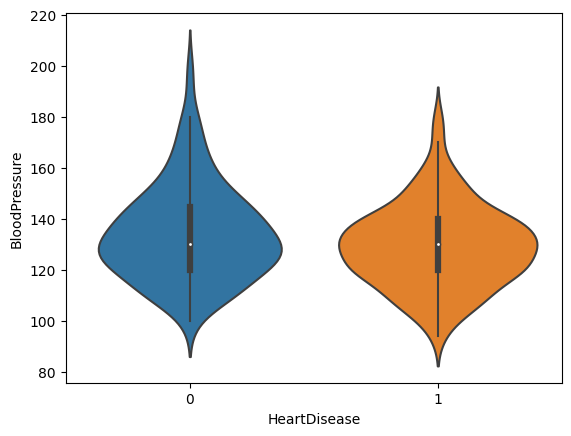

In [13]:
sns.violinplot(y=heart_data['BloodPressure'], x = heart_data['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

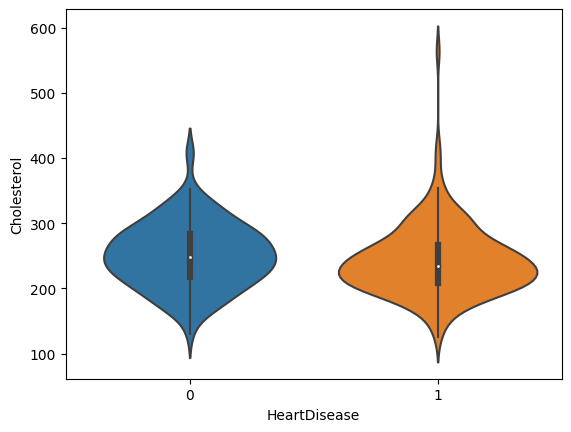

In [14]:
sns.violinplot(y=heart_data['Cholesterol'], x = heart_data['HeartDisease'])

In [15]:
#co-relation
heart_data.corr()

,Age,Sex,ChestPainType,BloodPressure,Cholesterol,BloodSugar,RestingECG,HeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,-0.280937
ChestPainType,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,0.433798
BloodPressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,-0.085239
BloodSugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,-0.028046
RestingECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,0.137230
HeartRate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,0.421741
ExerciseAngina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,-0.430696


<AxesSubplot:>

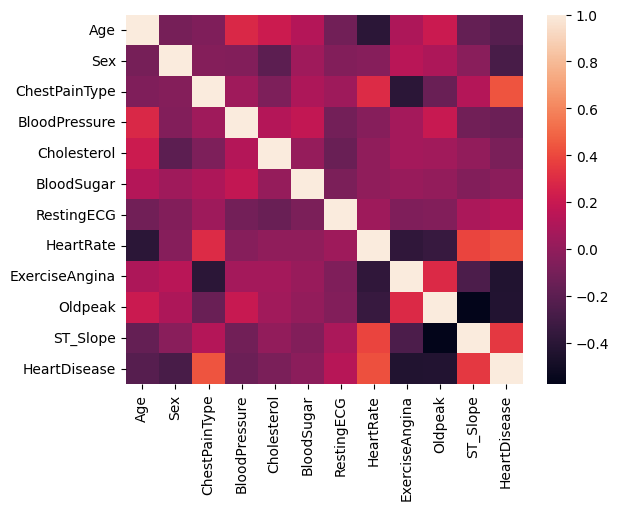

In [16]:
sns.heatmap(heart_data.corr())

JointPlot

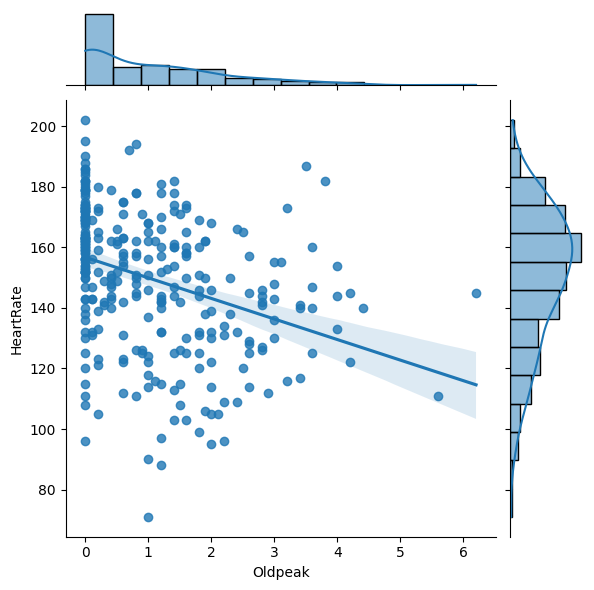

In [18]:
sns.jointplot(x = 'Oldpeak' , y= 'HeartRate' , data = heart_data , kind = 'reg')

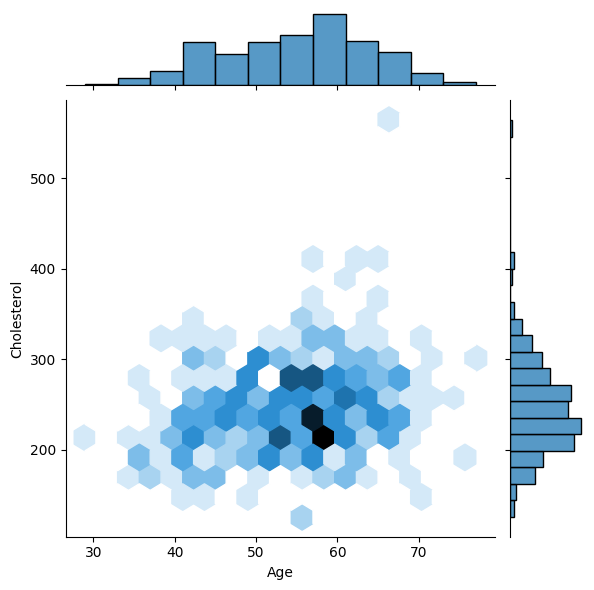

In [19]:
sns.jointplot(x = 'Age' , y= 'Cholesterol' , data = heart_data , kind = 'hex')

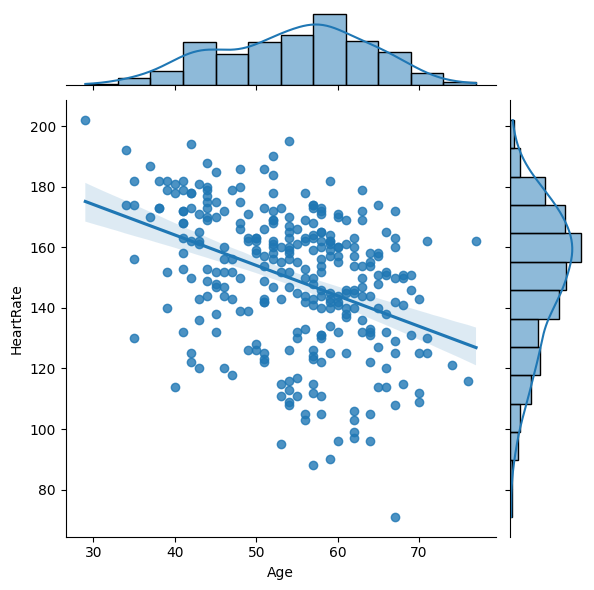

In [20]:
sns.jointplot(x = 'Age' , y= 'HeartRate' , data = heart_data , kind = 'reg')

PairPlot

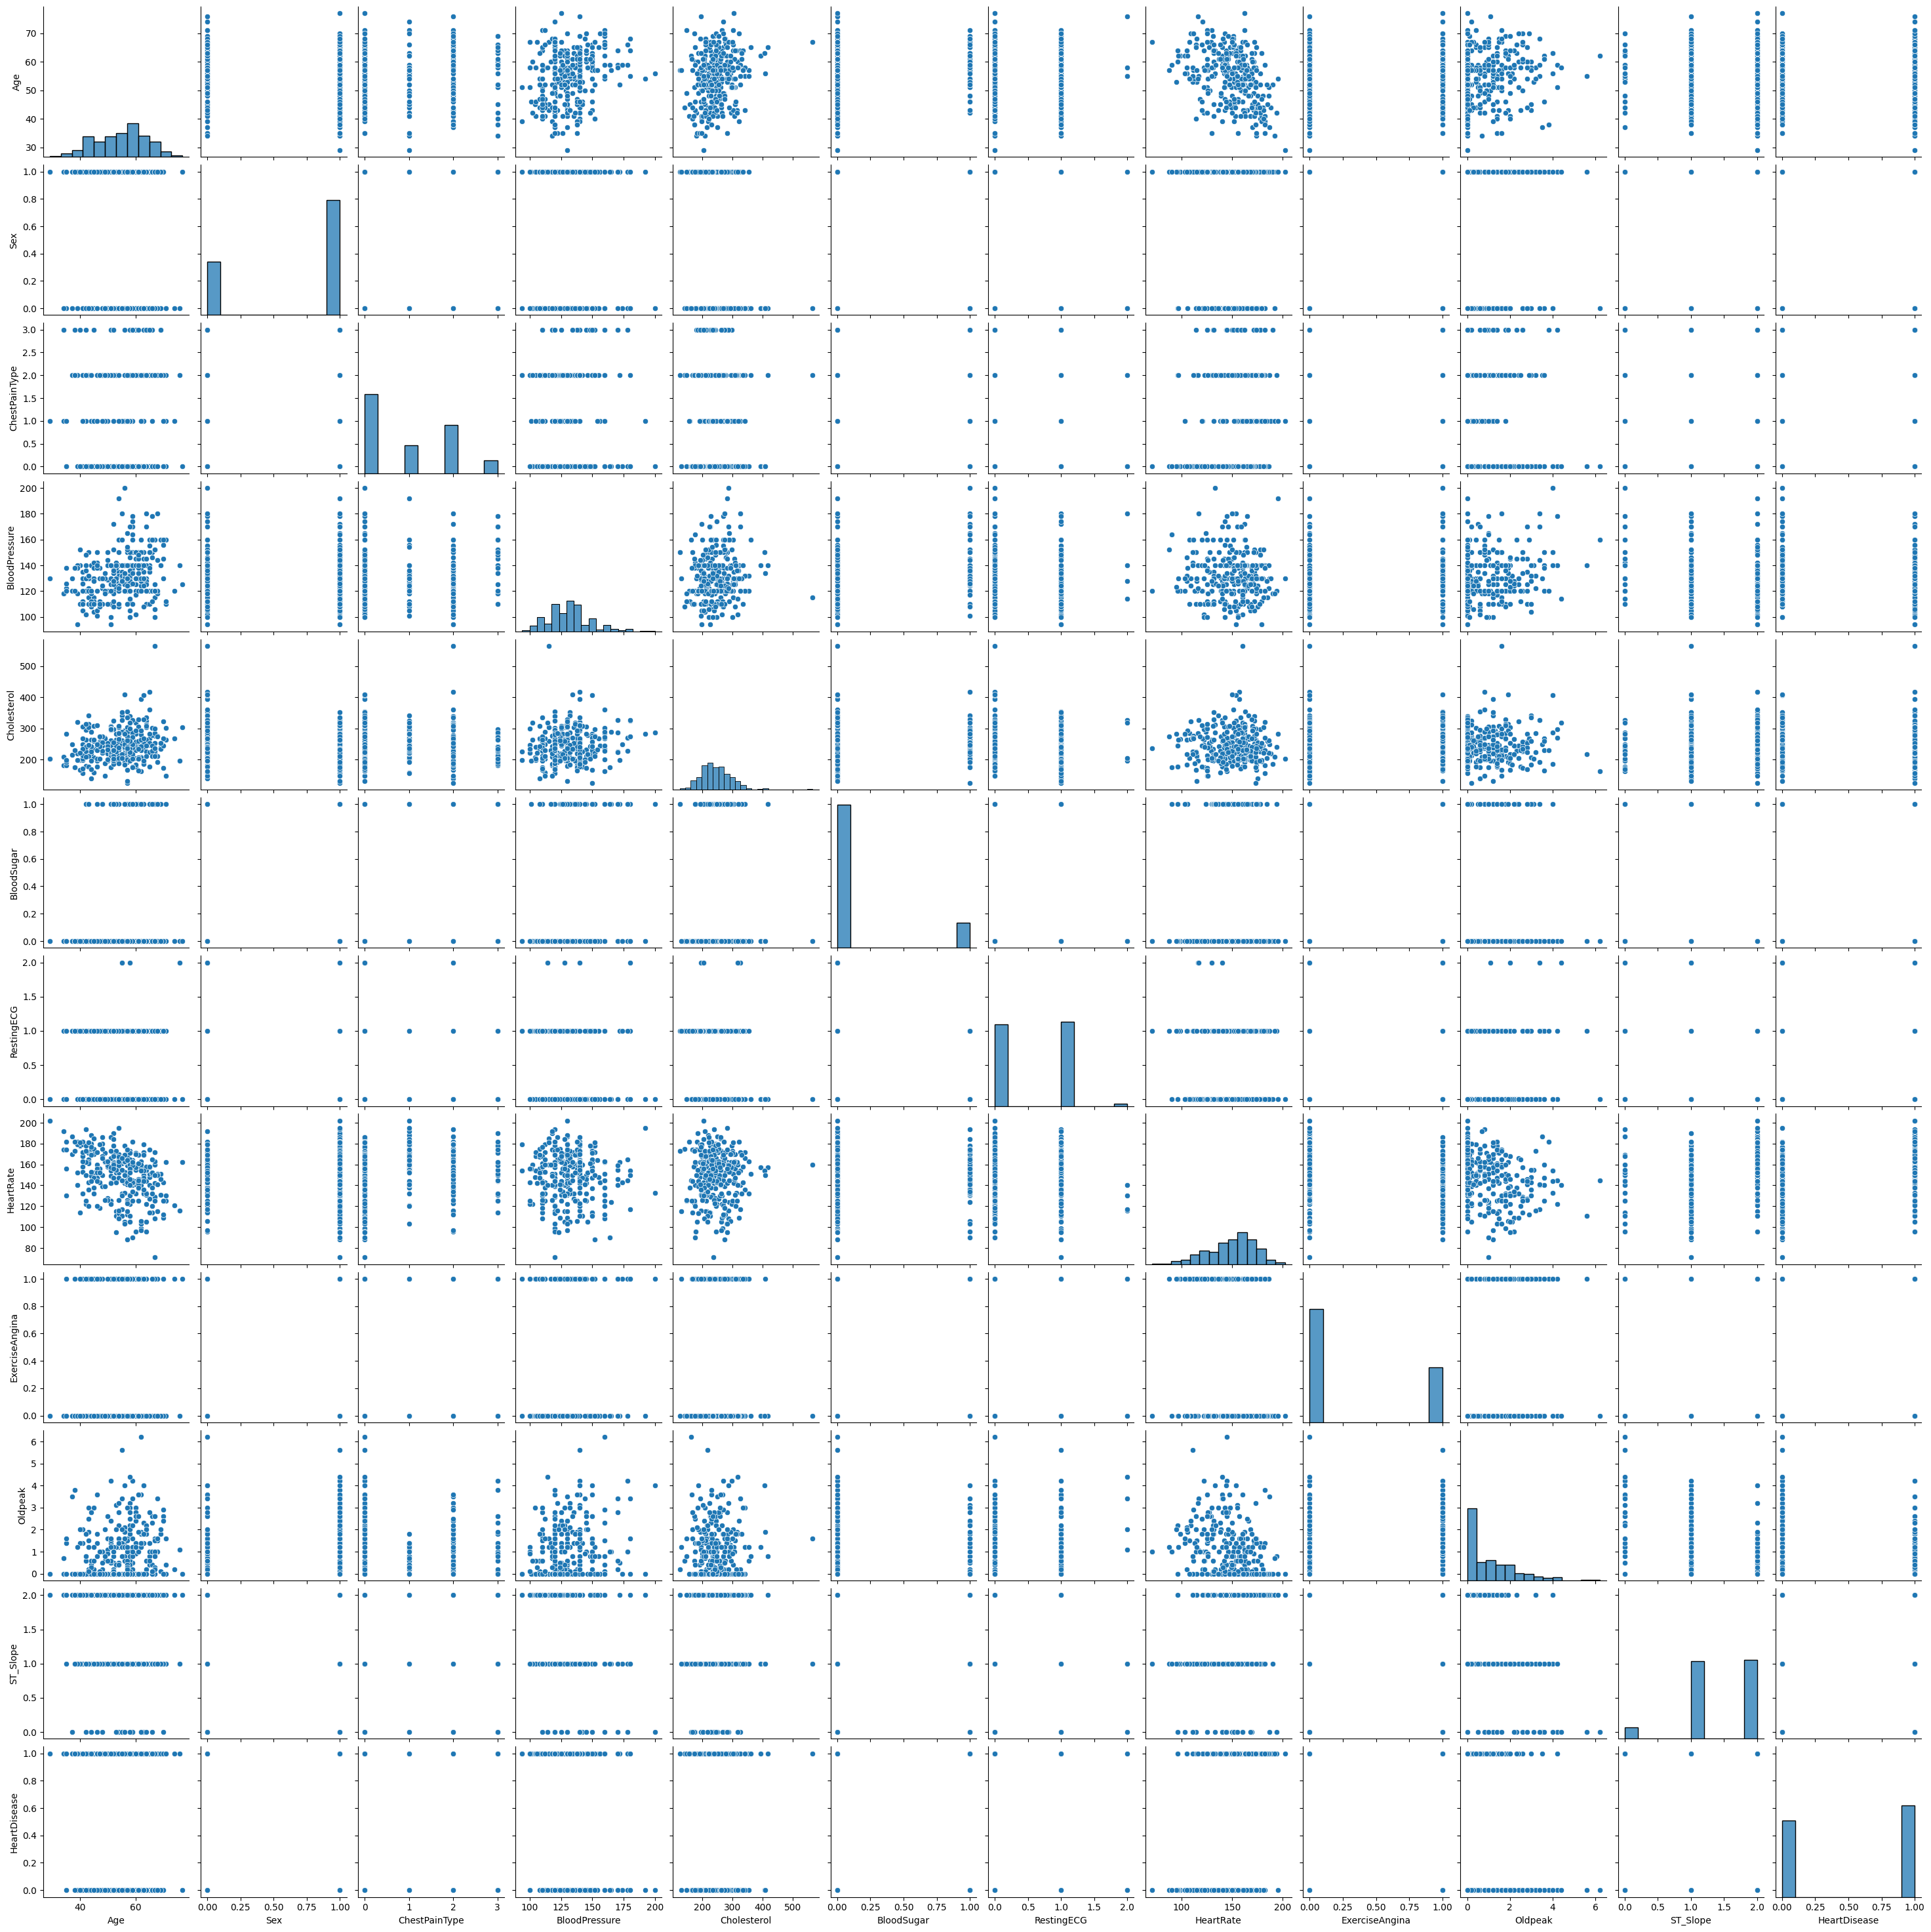

In [21]:
sns.pairplot(heart_data)